In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [44]:
data=pd.read_csv(r"C:\Users\mayur\Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [45]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [46]:
data.shape

(400, 3)

In [53]:
x=data.iloc[:,[0,1]]
y=data.iloc[:,2]

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [54]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [55]:
corr=data.corr()
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [48]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:>

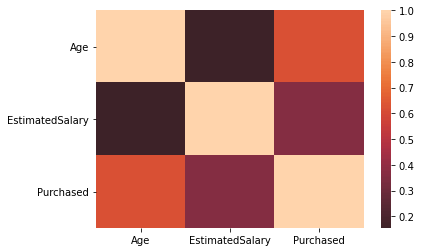

In [49]:
sns.heatmap(corr,center=0)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

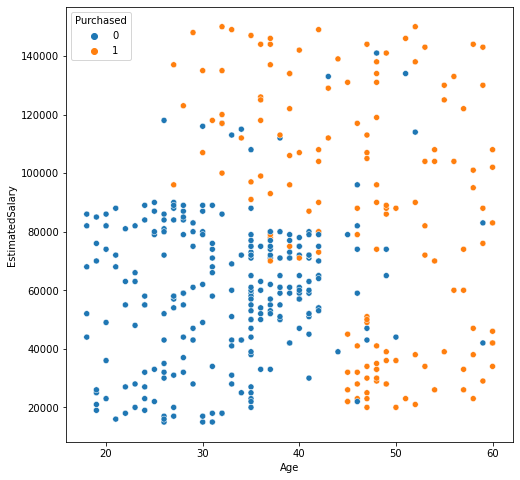

In [50]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary',hue='Purchased', data = data)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [58]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [61]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [65]:
print('accuracy with linear',accuracy_score(y_test,y_pred))

accuracy with linear 0.9125


In [66]:
classifier1=SVC(kernel='rbf')
classifier1.fit(x_train,y_train)

y_pred1=classifier1.predict(x_test)

In [67]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [68]:
print('accuracy with rbf',accuracy_score(y_test,y_pred1))

accuracy with rbf 0.95


In [73]:
classifier2=SVC(kernel='rbf',gamma=16,C=10)
classifier2.fit(x_train,y_train)

y_pred2=classifier2.predict(x_test)

In [74]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [75]:
print('accuracy with rbf(gamma,C)',accuracy_score(y_test,y_pred2))

accuracy with rbf(gamma,C) 0.8875


In [78]:
classifier3=SVC(kernel='poly',degree=4)
classifier3.fit(x_train,y_train)

y_pred3=classifier3.predict(x_test)

In [79]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [80]:
print('accuracy with poly',accuracy_score(y_test,y_pred3))

accuracy with poly 0.825


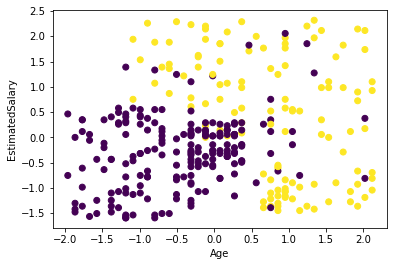

In [90]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

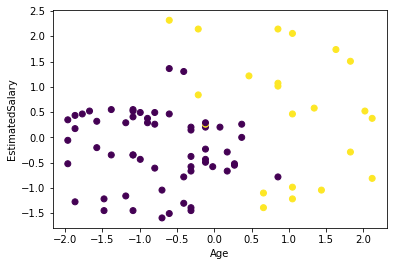

In [98]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

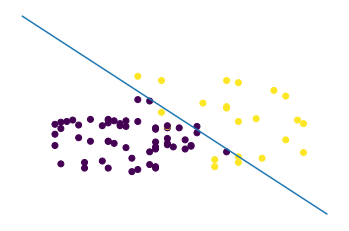

In [105]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')




w=classifier.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy= a * xx - (classifier.intercept_[0])/w[1]



plt.plot(xx,yy)


plt.axis("off")
plt.show()